<a href="https://colab.research.google.com/github/yuki-2000/Rocket/blob/main/RocketCEA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# はじめに

このプログラムは以下のサイトのプログラムを以下のサイトのプログラムをgooglecolab上で動かせるようにしたものです。

https://qiita.com/ina111/items/4e09711b9121db90dbaa

In [ ]:
!pip install rocketcea

In [ ]:
!python -c "from rocketcea.cea_obj import CEA_Obj; C=CEA_Obj(oxName='LOX', fuelName='LH2'); print(C.get_Isp())"

374.30361765576896


# NASA CEAの結果を出力
sample01.py

strはPythonの予約語なので、stringに変更

In [ ]:
from rocketcea.cea_obj import CEA_Obj 

ispObj = CEA_Obj( oxName='LOX', fuelName='CH4')
string = ispObj.get_full_cea_output( Pc=100.0, MR=6.0, eps=40.0, short_output=1, pc_units='bar', output='siunits')
# string = ispObj.get_full_cea_output( Pc=1000.0, MR=6.0, eps=40.0, frozen=1, frozenAtThroat=1, pc_units='bar')  # 凍結流の場合はこういうオプションをつける

print(string)


 *******************************************************************************

         NASA-GLENN CHEMICAL EQUILIBRIUM PROGRAM CEA, OCTOBER 18, 2002
                   BY  BONNIE MCBRIDE AND SANFORD GORDON
      REFS: NASA RP-1311, PART I, 1994 AND NASA RP-1311, PART II, 1996

 *******************************************************************************



 reac
  fuel CH4(L) C 1 H 4     wt%=100.
  h,cal=-21390.     t(k)=111.66   rho=0.4239
  oxid O2(L)  O 2
  h,cal=-3102.      t(k)=90.18       wt%=100.
  
 prob case=RocketCEA,
  rocket equilibrium   p,bar=100.000000,  supar=40.000000,
  o/f=6.000000,
  
  
 output siunits  short  transport
 end






              THEORETICAL ROCKET PERFORMANCE ASSUMING EQUILIBRIUM

           COMPOSITION DURING EXPANSION FROM INFINITE AREA COMBUSTOR

 Pinj =  1450.4 PSIA
 CASE = RocketCEA,     

             REACTANT                    WT FRACTION      ENERGY      TEMP
                                          (SEE NOTE)     KJ/KG-MOL      K 

# 必要な値を出力
sample02.py

In [ ]:
import numpy as np
from rocketcea.cea_obj_w_units import CEA_Obj

ceaObj = CEA_Obj( oxName='LOX', fuelName='C2H5OH', 
                  pressure_units='MPa', cstar_units='m/s', temperature_units='K')

print(ceaObj.desc)

# ---- 燃焼ガス特性などを見る(平衡流) ----
def show_perf(Pc=1.1, eps=2.3, MR=1.45):
    IspVac, Cstar, Tc, MW, gamma = ceaObj.get_IvacCstrTc_ChmMwGam(Pc=Pc, MR=MR, eps=eps)
    print( '%5.1f %8.1f   %6.1f  %8.1f    %8.1f    %8.1f  %8.2f  %8.4f '%\
         (Pc, eps, MR, IspVac, Cstar, Tc, MW, gamma))

print(' Pc(MPa) AreaRatio  O/F   IspVac(sec)  Cstar(m/s)  Tc(degK)   MolWt    gamma')
for MR in np.arange(1, 2, 0.1):
    show_perf(Pc=1.1, eps=2.3, MR=MR)

# ---- オマケ：Ispや⊿Vを確認する ----
Wpayload = 30.0 # [kg]
Wstg = 350.0 # [kg]
Wpropellant = 800.0 # [kg]
effIsp = 0.90 # Isp efficiency

Winit = Wstg + Wpropellant + Wpayload
Wfinal = Winit - Wpropellant

def show_deltaV(Pc=1.1, eps=2.3, MR=1.45):
    IspVacTheoritical = ceaObj.get_Isp(Pc=Pc, MR=MR, eps=eps)
    IspVacMeasured = effIsp * IspVacTheoritical
    IspSL, mode = ceaObj.estimate_Ambient_Isp(Pc=Pc, MR=MR, eps=eps, Pamb=0.1, frozen=0, frozenAtThroat=0)
    IspSLMeasured = effIsp * IspSL
    deltaV = 9.80665 * IspVacMeasured * np.log( Winit / Wfinal ) # [m/s]
    print( '%5.1f %8.1f %7.2f  %8.1f    %8.1f     %8.1f   %8.1f    %8.1f'%(Pc, eps, MR, IspVacTheoritical, IspVacMeasured, IspSL, IspSLMeasured, deltaV))
    # print(mode)

print()
print('Pc(MPa) AreaRatio  O/F  IspVac(s)  IspVac実測(s)  IspSL(s) IspSL実測(s)  deltaV(m/s)')

for eps in np.arange(1, 4, 0.5):
    show_deltaV(Pc=1.1, eps=eps, MR=1.45)

LOX / C2H5OH
 Pc(MPa) AreaRatio  O/F   IspVac(sec)  Cstar(m/s)  Tc(degK)   MolWt    gamma
  1.1      2.3      1.0     239.8      1575.2      2349.6     18.40    1.2232 
  1.1      2.3      1.1     248.0      1628.1      2595.0     19.27    1.1998 
  1.1      2.3      1.2     254.2      1667.5      2796.8     20.09    1.1761 
  1.1      2.3      1.3     258.7      1694.0      2951.3     20.82    1.1555 
  1.1      2.3      1.4     261.4      1708.3      3060.4     21.48    1.1401 
  1.1      2.3      1.5     262.6      1712.1      3132.0     22.05    1.1302 
  1.1      2.3      1.6     262.5      1708.7      3176.6     22.56    1.1244 
  1.1      2.3      1.7     261.5      1701.0      3203.1     23.01    1.1211 
  1.1      2.3      1.8     260.1      1691.0      3217.7     23.42    1.1192 
  1.1      2.3      1.9     258.5      1679.8      3224.3     23.80    1.1181 

Pc(MPa) AreaRatio  O/F  IspVac(s)  IspVac実測(s)  IspSL(s) IspSL実測(s)  deltaV(m/s)
  1.1      1.0    1.45     215.2      

# リストにない推進剤を使う
sample03.py

strはPythonの予約語なので、stringに変更

In [ ]:
# cf. https://rocketcea.readthedocs.io/en/latest/new_propellants.html

from rocketcea.cea_obj import CEA_Obj, add_new_fuel, add_new_oxidizer, add_new_propellant

card_str = """
name H2O2(L) H 2 O 2  wt%=100.00
h,cal=-44880.0     t(k)=298.15  rho.g/cc=1.407
"""

add_new_propellant( 'MyProp', card_str )
ceaObj = CEA_Obj(propName="MyProp")

string = ceaObj.get_full_cea_output( Pc=250.0, eps=40.0, short_output=1, output='siunits')

print(string)


 *******************************************************************************

         NASA-GLENN CHEMICAL EQUILIBRIUM PROGRAM CEA, OCTOBER 18, 2002
                   BY  BONNIE MCBRIDE AND SANFORD GORDON
      REFS: NASA RP-1311, PART I, 1994 AND NASA RP-1311, PART II, 1996

 *******************************************************************************



 reac
  name H2O2(L) H 2 O 2  wt%=100.00
  h,cal=-44880.0     t(k)=298.15  rho.g/cc=1.407
  
 prob case=RocketCEA,
  rocket equilibrium   p,psia=250.000000,  supar=40.000000,
  
  
  
 output siunits  short  transport
 end






              THEORETICAL ROCKET PERFORMANCE ASSUMING EQUILIBRIUM

           COMPOSITION DURING EXPANSION FROM INFINITE AREA COMBUSTOR

 Pinj =   250.0 PSIA
 CASE = RocketCEA,     

             REACTANT                    WT FRACTION      ENERGY      TEMP
                                          (SEE NOTE)     KJ/KG-MOL      K  
 NAME        H2O2(L)                      1.0000000   -187777.920    2

# c*効率をグラフで可視化する
sample04.py

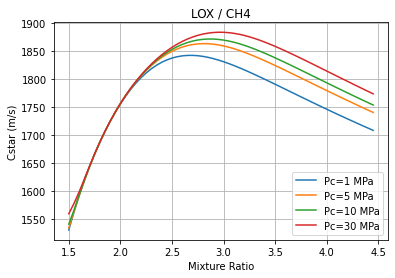

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from rocketcea.cea_obj_w_units import CEA_Obj 

ceaObj = CEA_Obj(propName='', oxName='LOX', fuelName="CH4", cstar_units='m/s', pressure_units='MPa')

pcArr = [ 1, 5, 10, 30]

for Pc in pcArr:
    mrArr = np.arange(1.5, 4.5, 0.05)
    cstarArr = [ceaObj.get_Cstar(Pc=Pc, MR=MR) for MR in mrArr]
    # 上のリスト内包表記に慣れていない人は下のコメント行と同じと思ってもらうと比較的わかりやすい
    # cstarArr = []
    # for MR in mrArr:
    #     cstarArr.append( ceaObj.get_Cstar( Pc=Pc, MR=MR) )
    plt.plot(mrArr, cstarArr, label='Pc=%g MPa' % Pc)

plt.legend(loc='best')
plt.grid(True)
plt.title(ceaObj.desc)
plt.xlabel('Mixture Ratio')
plt.ylabel('Cstar (m/s)')
plt.show()

# Ispをグラフで可視化する
sample05.py

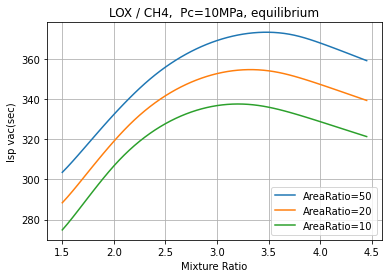

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from rocketcea.cea_obj_w_units import CEA_Obj 

ceaObj = CEA_Obj(propName='', oxName='LOX', fuelName="CH4", temperature_units='K', pressure_units='MPa')

Pc = 10.0
area_ratio = [50.0, 20.0, 10.0]

for eps in area_ratio:
    mrArr = np.arange(1.5, 4.5, 0.05)
    ispArr = [ceaObj(Pc, MR, eps ) for MR in mrArr]
    # ispArr = [ceaObj.estimate_Ambient_Isp(Pc, MR, eps, Pamb=0.1013)[0] for MR in mrArr]
    plt.plot(mrArr, ispArr, label='AreaRatio=%g'%eps)

plt.legend(loc='best')
plt.grid(True)
plt.title(ceaObj.desc + ",  Pc=%dMPa"%Pc + ', equilibrium')
plt.xlabel('Mixture Ratio')
plt.ylabel('Isp vac(sec)')
plt.show()

# 有限体積燃焼室、平衡流、凍結流の違いを見る
sample06.py

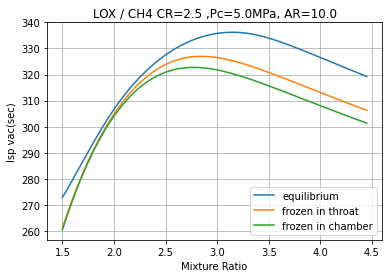

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from rocketcea.cea_obj_w_units import CEA_Obj 

Pc = 5.0
area_ratio = 10.0
chamber_contraction_ratio = 2.5
mrArr = np.arange(1.5, 4.5, 0.05)

ispObj = CEA_Obj(propName='', oxName='LOX', fuelName="CH4", fac_CR=chamber_contraction_ratio, temperature_units='K', pressure_units='MPa')

plt.figure()

ispArr = [ispObj.get_Isp(Pc, MR, area_ratio, frozen=0, frozenAtThroat=0) for MR in mrArr]
plt.plot(mrArr, ispArr, label='equilibrium')
ispArr = [ispObj.get_Isp(Pc, MR, area_ratio, frozen=1, frozenAtThroat=1) for MR in mrArr]
plt.plot(mrArr, ispArr, label='frozen in throat')
ispArr = [ispObj.get_Isp(Pc, MR, area_ratio, frozen=1, frozenAtThroat=0) for MR in mrArr]
plt.plot(mrArr, ispArr, label='frozen in chamber')

plt.legend(loc='best')
plt.grid(True)
plt.title(ispObj.desc + " ,Pc=%.1fMPa, AR=%.1f" % (Pc, area_ratio))
plt.xlabel('Mixture Ratio')
plt.ylabel('Isp vac(sec)')
plt.show()

# いろんなグラフを出す
sample07.py

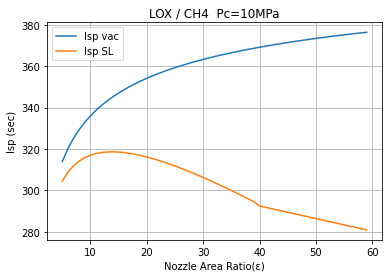

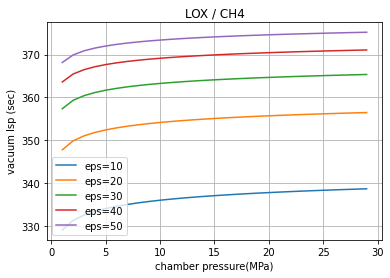

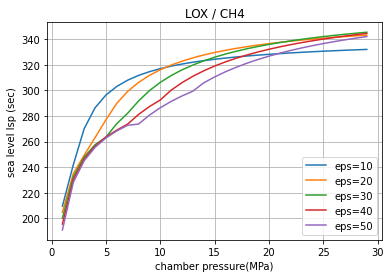

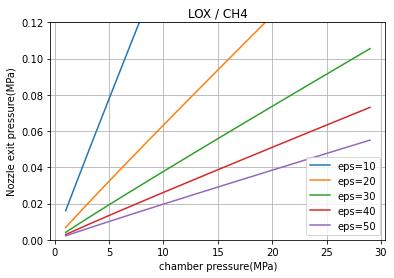

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from rocketcea.cea_obj_w_units import CEA_Obj 

ispObj = CEA_Obj(propName='', oxName='LOX', fuelName="CH4", temperature_units='K', pressure_units='MPa')
plt.ion()
# -----------------

Pc = 10.0
MR = 3.5

plt.figure()
epsArr = np.arange(5, 60, 1)
ispVacArr = [ispObj.get_Isp(Pc, MR, eps) for eps in epsArr]
ispSLArr = [ispObj.estimate_Ambient_Isp(Pc, MR, eps, Pamb=0.1013)[0] for eps in epsArr]
plt.plot(epsArr, ispVacArr, label='Isp vac')
plt.plot(epsArr, ispSLArr, label='Isp SL')
plt.legend(loc='best')
plt.grid(True)
plt.title(ispObj.desc + "  Pc=%dMPa"%Pc)
plt.xlabel('Nozzle Area Ratio(ε)')
plt.ylabel('Isp (sec)')

# -----------------
MR = 3.5
epsArr = [10, 20, 30, 40, 50]

plt.figure()
for eps in epsArr:
    pcArr = np.arange(1, 30, 1)
    ispVacArr = [ispObj.get_Isp(Pc, MR, eps) for Pc in pcArr]
    plt.plot(pcArr, ispVacArr, label='eps=%d'%eps)
plt.legend(loc='best')
plt.grid(True)
plt.title(ispObj.desc)
plt.xlabel('chamber pressure(MPa)')
plt.ylabel('vacuum Isp (sec)')

# -----------------
MR = 3.5
epsArr = [10, 20, 30, 40, 50]

plt.figure()
for eps in epsArr:
    pcArr = np.arange(1, 30, 1)
    ispSLArr = [ispObj.estimate_Ambient_Isp(Pc, MR, eps, Pamb=0.1013)[0] for Pc in pcArr]
    plt.plot(pcArr, ispSLArr, label='eps=%d'%eps)
plt.legend(loc='best')
plt.grid(True)
plt.title(ispObj.desc)
plt.xlabel('chamber pressure(MPa)')
plt.ylabel('sea level Isp (sec)')

# -----------------
MR = 3.5
epsArr = [10, 20, 30, 40, 50]

plt.figure()
for eps in epsArr:
    pcArr = np.arange(1, 30, 1)
    peArr = [Pc / ispObj.get_PcOvPe(Pc, MR, eps) for Pc in pcArr]
    plt.plot(pcArr, peArr, label='eps=%d'%eps)
plt.legend(loc='best')
plt.grid(True)
plt.title(ispObj.desc)
plt.xlabel('chamber pressure(MPa)')
plt.ylabel('Nozzle exit pressure(MPa)')
plt.ylim([0, 0.12])

plt.show()



# 固体ロケット（その１）
sample08.py

In [ ]:
from rocketcea.cea_obj import CEA_Obj, add_new_fuel, add_new_oxidizer, add_new_propellant

card_str = """
name NH4CLO4(I) wt=100 t,k=298
name AL(cr) wt=25 t,k=298
name HTPB wt=75 t,k=298
h,kj/mol=23.99 C 4 H 6 O 0.04 H 0.04 
"""
add_new_propellant( 'MySolid', card_str )
ceaObj = CEA_Obj(propName="MySolid")

s = ceaObj.get_full_cea_output( Pc=50.0, eps=3.0, short_output=1, pc_units='bar', output='siunits')
print(s)


 *******************************************************************************

         NASA-GLENN CHEMICAL EQUILIBRIUM PROGRAM CEA, OCTOBER 18, 2002
                   BY  BONNIE MCBRIDE AND SANFORD GORDON
      REFS: NASA RP-1311, PART I, 1994 AND NASA RP-1311, PART II, 1996

 *******************************************************************************



 reac
  name NH4CLO4(I) wt=100 t,k=298
  name AL(cr) wt=25 t,k=298
  name HTPB wt=75 t,k=298
  h,kj/mol=23.99 C 4 H 6 O 0.04 H 0.04
  
 prob case=RocketCEA,
  rocket equilibrium   p,bar=50.000000,  supar=3.000000,
  
  
  
 output siunits  short  transport
 end


 WARNING!!  MAXIMUM ALLOWED NO. OF SPECIES 30 WAS USED IN 
 TRANSPORT PROPERTY CALCULATIONS FOR POINT  1(TRANIN))

 WARNING!!  MAXIMUM ALLOWED NO. OF SPECIES 30 WAS USED IN 
 TRANSPORT PROPERTY CALCULATIONS FOR POINT  2(TRANIN))

 WARNING!!  MAXIMUM ALLOWED NO. OF SPECIES 30 WAS USED IN 
 TRANSPORT PROPERTY CALCULATIONS FOR POINT  3(TRANIN))





              THEORE

# 固体ロケット（その２）
sample09.py

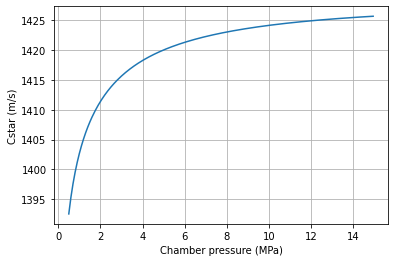

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from rocketcea.cea_obj import add_new_fuel, add_new_oxidizer, add_new_propellant
from rocketcea.cea_obj_w_units import CEA_Obj

card_str = """
name NH4CLO4(I) wt=100 t,k=298
name AL(cr) wt=25 t,k=298
name HTPB wt=75 t,k=298
h,kj/mol=23.99 C 4 H 6 O 0.04 H 0.04 
"""
add_new_propellant( 'MySolid', card_str )
ceaObj = CEA_Obj(propName="MySolid", cstar_units='m/s', pressure_units='MPa')

pcArr = np.arange(0.5, 15, 0.05)
cstarArr = [ceaObj.get_Cstar(Pc=Pc) for Pc in pcArr]
plt.plot(pcArr, cstarArr)
plt.grid(True)
plt.xlabel('Chamber pressure (MPa)')
plt.ylabel('Cstar (m/s)')
plt.show()

# 固体ロケット（その３）
sample10.py

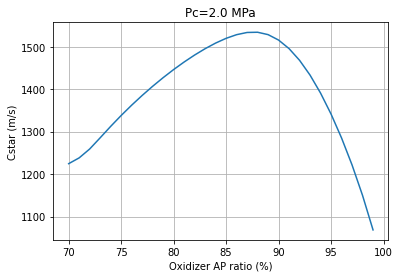

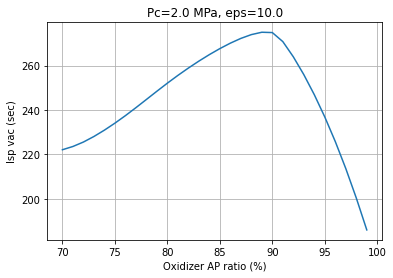

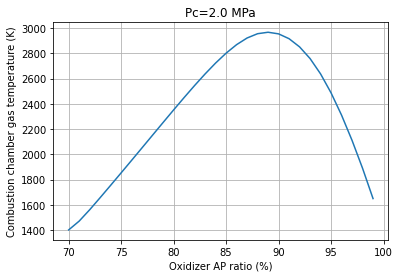

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from rocketcea.cea_obj import add_new_fuel, add_new_oxidizer, add_new_propellant
from rocketcea.cea_obj_w_units import CEA_Obj

def make_ceaObj_from_newprop(ox_ratio=0):
    wtOxid = ox_ratio
    wtFuel = 100 - ox_ratio
    card_str = """
    name NH4CLO4(I) wt=%d t,k=298
    name HTPB wt=%d t,k=298
    h,kj/mol=23.99 C 4 H 6 O 0.04 H 0.04 
    """ % (wtOxid, wtFuel)
    prop_name = 'MySolid' + str(ox_ratio) # 名前は新しくつけないといけない
    add_new_propellant(prop_name, card_str )
    ceaObj = CEA_Obj(propName=prop_name, 
                     cstar_units='m/s', pressure_units='MPa', temperature_units='K')
    return ceaObj

ox_ratioArr = np.arange(70, 100, 1)
Pc = 2.0 # (MPa)
eps = 10

ispArr = []
cstarArr = []
tcombArr = []
for i in ox_ratioArr:
    ceaObj = make_ceaObj_from_newprop(i)
    cstarArr.append(ceaObj.get_Cstar(Pc=Pc))
    ispArr.append(ceaObj.get_Isp(Pc=Pc, eps=eps))
    tcombArr.append(ceaObj.get_Tcomb(Pc=Pc))

plt.figure()
plt.plot(ox_ratioArr, cstarArr)
plt.grid(True)
plt.title("Pc=%.1f MPa" % (Pc))
plt.xlabel('Oxidizer AP ratio (%)')
plt.ylabel('Cstar (m/s)')

plt.figure()
plt.plot(ox_ratioArr, ispArr)
plt.grid(True)
plt.title("Pc=%.1f MPa, eps=%.1f" % (Pc, eps))
plt.xlabel('Oxidizer AP ratio (%)')
plt.ylabel('Isp vac (sec)')

plt.figure()
plt.plot(ox_ratioArr, tcombArr)
plt.grid(True)
plt.title("Pc=%.1f MPa" % (Pc))
plt.xlabel('Oxidizer AP ratio (%)')
plt.ylabel('Combustion chamber gas temperature (K)')

plt.show()


# 推進剤比較
sample11.py

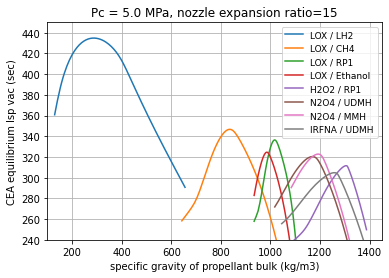

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from rocketcea.cea_obj_w_units import CEA_Obj
from rocketcea.biprop_utils.density_at_mr import bulkDensity
from rocketcea.biprop_utils.mr_t_limits import MR_Temperature_Limits

def plot_Isp_from_prop(oxName="LOX", fuelName="LH2", Pc=5.0, eps=15):
    ceaObj = CEA_Obj(propName='', oxName=oxName, fuelName=fuelName, cstar_units='m/s', pressure_units='MPa')
    mrObj = MR_Temperature_Limits(oxName=oxName, fuelName=fuelName, MR_MAX=20.0)
    if mrObj.min_MR < 1:
        mrObj.min_MR = 1 
    mrArr = np.arange(mrObj.min_MR, mrObj.max_MR, 0.1)
    sgArr = bulkDensity(oxName, fuelName, mrArr) * 1000 # (g/mL) -> (kg/m3)
    ispArr = [ceaObj.get_Isp(Pc=Pc, MR=MR, eps=eps) for MR in mrArr]
    plt.plot(sgArr, ispArr, label="%s / %s"%(oxName, fuelName))

plt.figure()

plot_Isp_from_prop(oxName="LOX", fuelName="LH2")
plot_Isp_from_prop(oxName="LOX", fuelName="CH4")
plot_Isp_from_prop(oxName="LOX", fuelName="RP1")
plot_Isp_from_prop(oxName="LOX", fuelName="Ethanol")
plot_Isp_from_prop(oxName="H2O2", fuelName="RP1")
plot_Isp_from_prop(oxName="N2O4", fuelName="UDMH")
plot_Isp_from_prop(oxName="N2O4", fuelName="MMH")
plot_Isp_from_prop(oxName="IRFNA", fuelName="UDMH")

plt.legend(loc='best', fontsize=9)
plt.xlabel('specific gravity of propellant bulk (kg/m3)')
plt.ylabel('CEA equilibrium Isp vac (sec)')
plt.xlim([100, 1450])
plt.ylim([240, 450])
plt.yticks(np.arange(240, 450, 20))
plt.title("Pc = 5.0 MPa, nozzle expansion ratio=15")
plt.grid(True)
plt.show()